In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch, VerticalPitch

In [2]:
df = pd.read_csv('muvswestham.csv')

In [3]:
df

,x,y,xg,team,minute,result
0,0.858,0.388,0.077033,Manchester United,3,BlockedShot
1,0.746,0.681,0.044517,Manchester United,8,BlockedShot
2,0.862,0.358,0.042056,Manchester United,8,BlockedShot
3,0.763,0.629,0.023067,Manchester United,13,BlockedShot
4,0.912,0.451,0.049727,Manchester United,21,MissedShots
5,0.822,0.685,0.026882,Manchester United,47,BlockedShot
6,0.848,0.660,0.046194,Manchester United,48,SavedShot
7,0.915,0.602,0.031502,Manchester United,57,MissedShots
8,0.859,0.648,0.032835,Manchester United,60,MissedShots
9,0.707,0.455,0.015381,Manchester United,63,MissedShots


In [4]:
a_xg = [0]
h_xg = [0]
a_time = [0]
h_time = [0]

hteam = df['team'].iloc[0]
ateam = df['team'].iloc[-1]

In [5]:
for x in range(len(df['xg'])):
    if df['team'][x] == hteam:
        h_xg.append(df['xg'][x])
        h_time.append(df['minute'][x])
    elif df['team'][x] == ateam:
        a_xg.append(df['xg'][x])
        a_time.append(df['minute'][x])

In [6]:
def nums_list_cumulative(nums_list):
    return [sum(nums_list[:i+1]) for i in range(len(nums_list))]

h_cumulative = nums_list_cumulative(h_xg)
a_cumulative = nums_list_cumulative(a_xg)

In [7]:
h_goal = []
h_time_goal = []
for i in range(len(df['result'])):
    if df['result'][i] == 'Goal':
        h_goal = h_cumulative[i+1]
        h_time_goal = df['minute'][i]

In [8]:
h_cumulative

[0,
 0.07703341543674469,
 0.121550552546978,
 0.16360639408230782,
 0.1866733320057392,
 0.23640036955475807,
 0.2632820662111044,
 0.30947563983500004,
 0.34097750671207905,
 0.373812073841691,
 0.3891932209953666,
 0.4358463389798999,
 0.5256301267072558,
 0.538175081834197,
 0.5996923837810755,
 0.6155271325260401,
 0.7158096972852945,
 0.8183469567447901,
 1.7585672531276941]

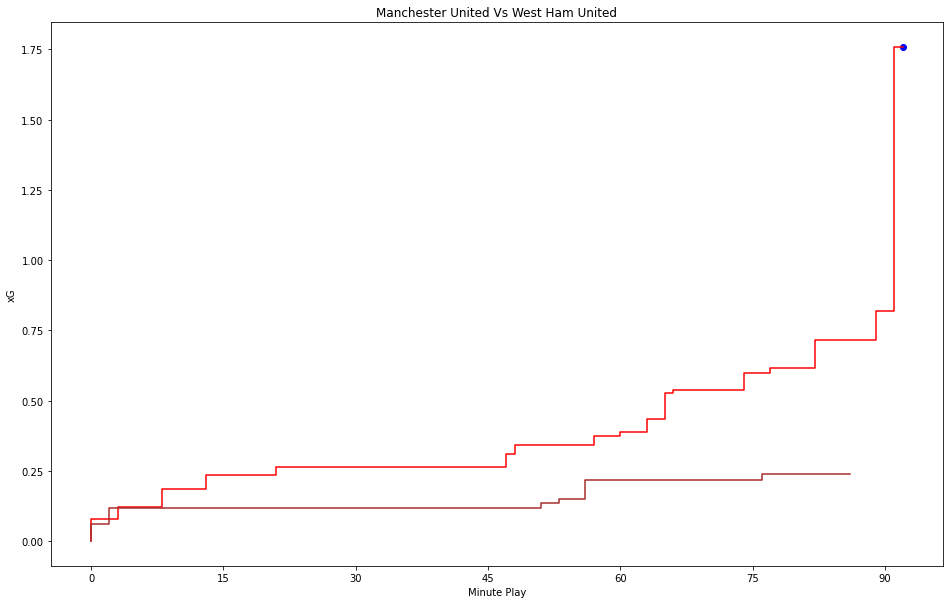

In [9]:
fig, ax = plt.subplots(figsize=(16,10))
plt.xticks([0,15,30,45,60,75,90])
plt.xlabel('Minute Play')
plt.ylabel('xG')
plt.title('Manchester United Vs West Ham United')

plt.scatter(x=h_time_goal, y=h_goal, color='blue')
ax.step(x=h_time, y=h_cumulative, color='red')
ax.step(x=a_time, y=a_cumulative, color='brown')

In [10]:
df['x'] = round(df['x']*100, 2)*1.2
df['y'] = round(df['y']*100, 2)*.8

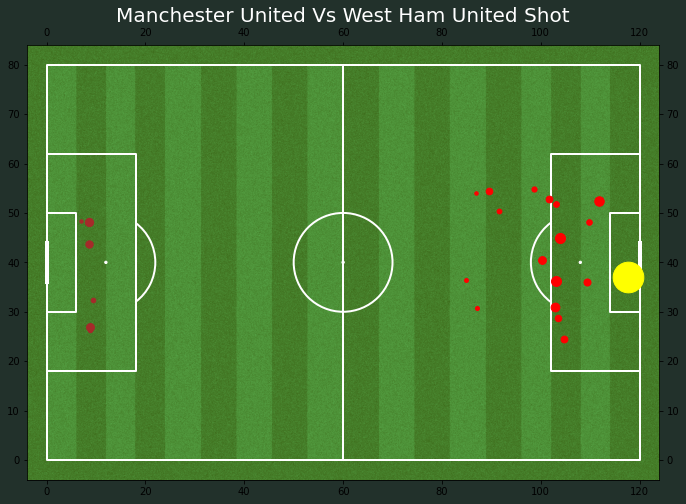

In [17]:
# membuat pitch xGoal
fig, ax = plt.subplots(figsize=(13.5, 8))
fig.set_facecolor('#22312b')
# ax.patch.set_facecolor('#22312b')

pitch = Pitch(pitch_type='statsbomb', orientation='horizontal', 
              pitch_color='grass', line_color='white', stripe=True, figsize=(16,11), constrained_layout=True,
             tight_layout=False, axis=True, tick=True, label=True)
pitch.draw(ax=ax)
plt.gca().invert_yaxis()
plt.title('Manchester United Vs West Ham United Shot', color='White', size=20)

for i in range(len(df['x'])):
    if df['team'][i] == 'Manchester United':
        if df['result'][i] == 'Goal':
            plt.scatter(df['x'][i], df['y'][i], color='yellow', s=df['xg'][i]*1000)
        else:
            plt.scatter(df['x'][i], df['y'][i], color='red', s=df['xg'][i]*1000)
    elif df['team'][i] == 'West Ham':
        if df['result'][i] == 'Goal':
            plt.scatter((df['x'][i]/12), df['y'][i], color='yellow', s=df['xg'][i]*1000)
        else:
            plt.scatter((df['x'][i]/12), df['y'][i], color='brown', s=df['xg'][i]*1000)

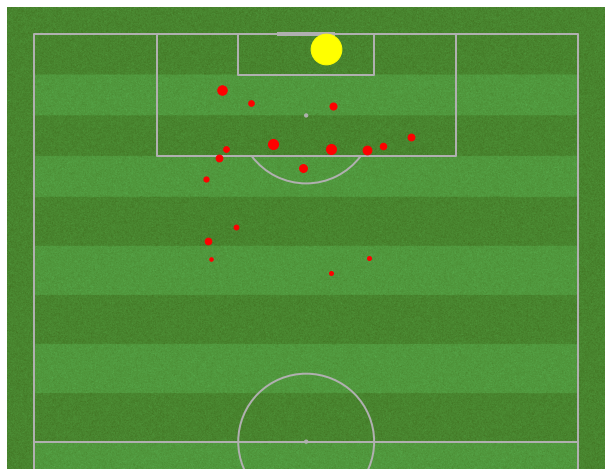

In [23]:
fig, ax = plt.subplots(figsize=(13, 8.5))

pitch = VerticalPitch(pitch_type='statsbomb', pitch_color='grass', orientation='vertical', constrained_layout=True, 
                      stripe=True, half=True)
pitch.draw(ax=ax)
plt.gca().invert_xaxis()

for i in range(len(df['x'])):
    if df['team'][i] == 'Manchester United':
        if df['result'][i] == 'Goal':
            plt.scatter(df['y'][i], df['x'][i], color='yellow', s=df['xg'][i]*1000)
        else:
            plt.scatter(df['y'][i], df['x'][i], color='red', s=df['xg'][i]*1000)